# Տվյալների ներմուծում և ստուգում

In [53]:
# բեռնում ենք անհրաժեշտ package-ները
# !pip install matplotlib
# !pip install pandas
# !pip install seaborn
# !pip install scipy
# !pip install statsmodels
# !pip install scikit-learn

Ներմուծում ենք տվյալները

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [14]:
df = pd.read_csv("WineQT.csv")

In [15]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [16]:
del df['Id']

Ստուգում ենք, թե արդյոք կան տվյալներում 

In [17]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Ցուցադրում ենք տվյալների փոփոխականների մասին ինֆո

In [18]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Տվյալների անալիզ

Պատկերում ենք 2չափանի կետային ամպերը

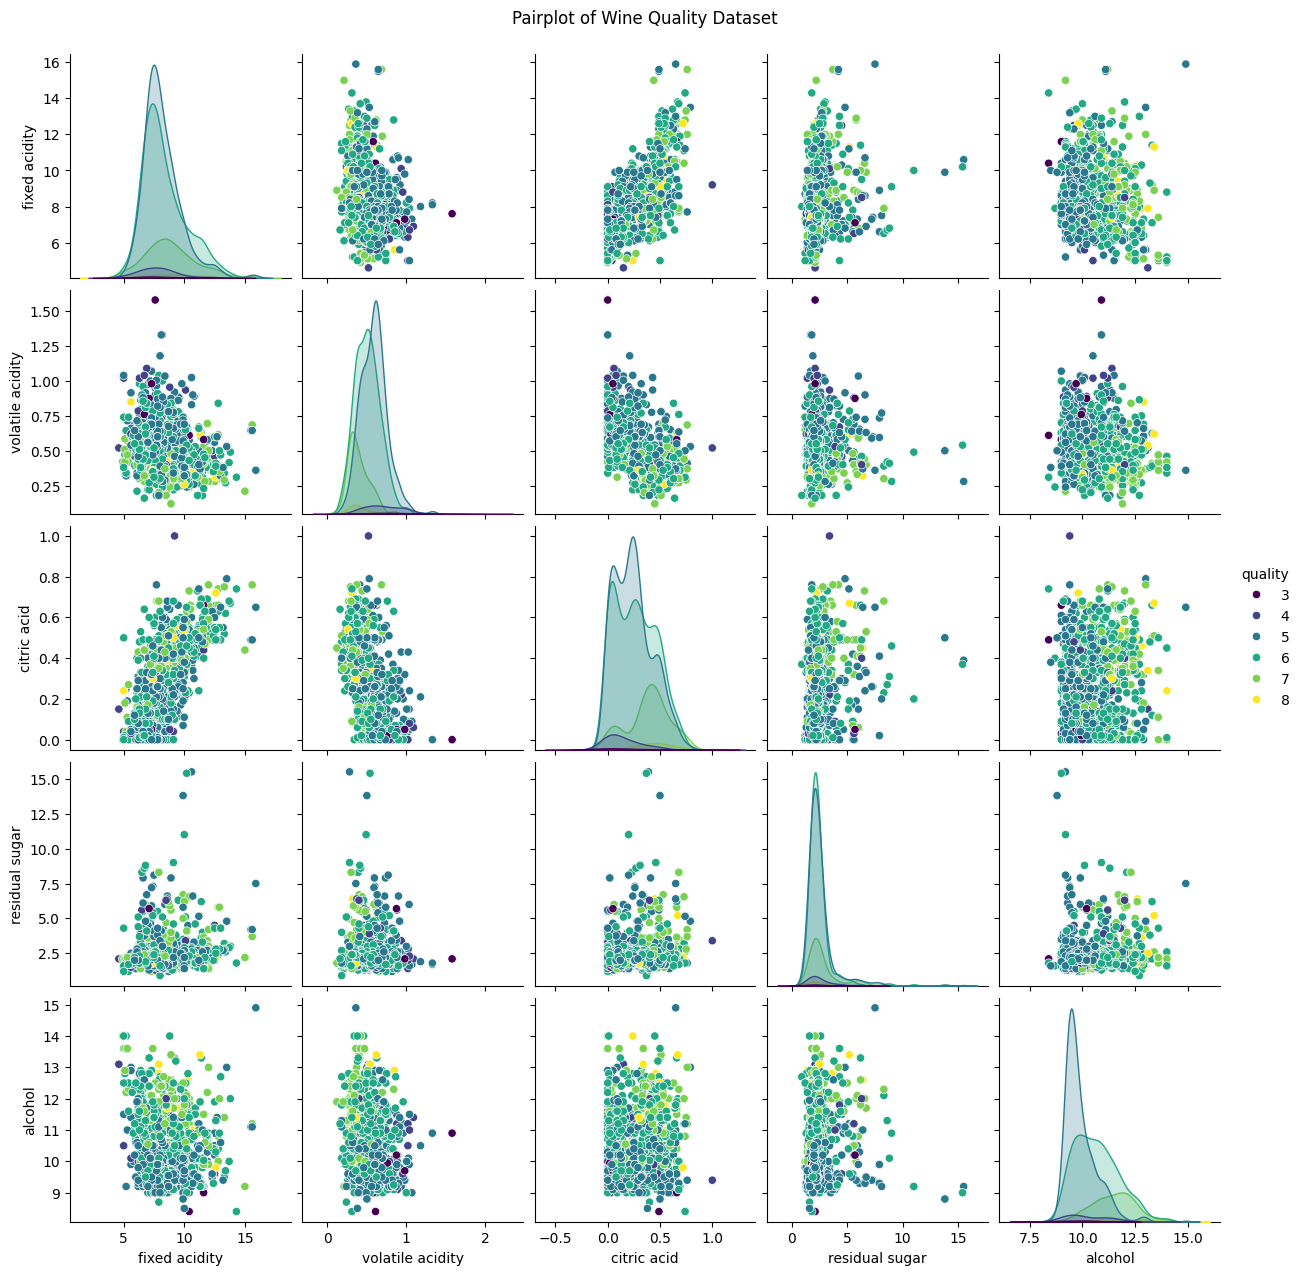

In [19]:
subset_data = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'alcohol', 'quality']]

sns.pairplot(subset_data, hue='quality', palette='viridis')
plt.suptitle('Pairplot of Wine Quality Dataset', y=1.02)
plt.show()

In [20]:
from scipy.stats import shapiro, kstest, anderson, skew, kurtosis, norm
import statsmodels.api as sm

In [21]:
variables = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'alcohol']

In [48]:
# սահմանենք ֆունկցիա, որը կկատարի մի քանի հայտնի նորմալության թեստեր, թե տվյալ փոփոխականը(ները) ունեն Գաուսյան բաշխում, թե ոչ
def simplified_normality_tests(data):
    results = {}
    for var in data.columns:
        shapiro_p = shapiro(data[var])[1]
        ks_p = kstest(data[var], 'norm', args=(data[var].mean(), data[var].std()))[1]
        ad_result = anderson(data[var], 'norm')
        ad_stat = ad_result.statistic
        ad_crit = ad_result.critical_values[2] 
        ad_sig = ad_stat > ad_crit

        results[var] = {
            'Shapiro-Wilk Test': 'Yes' if shapiro_p > 0.05 else 'No',
            'Kolmogorov-Smirnov Test': 'Yes' if ks_p > 0.05 else 'No',
            'Anderson-Darling Test': 'Yes' if not ad_sig else 'No'
        }
    return pd.DataFrame(results).T

Եթե ինչ-որ թեստի արդյունքում p արժեքը փոքր է 0.05-ից, ապա կմերժենք զրոյական վարկածը(նորմալություն), և կասենք որ նորմալ բաշխումից չէ։

In [49]:
results = simplified_normality_tests(df[variables])
print(results)

                 Shapiro-Wilk Test Kolmogorov-Smirnov Test  \
fixed acidity                   No                      No   
volatile acidity                No                      No   
citric acid                     No                      No   
residual sugar                  No                      No   
alcohol                         No                      No   

                 Anderson-Darling Test  
fixed acidity                       No  
volatile acidity                    No  
citric acid                         No  
residual sugar                      No  
alcohol                             No  


# Գծային ռեգրեսիա

In [51]:
X = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'alcohol']]
y = df['quality']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     117.9
Date:                Fri, 07 Jun 2024   Prob (F-statistic):          1.40e-100
Time:                        14:05:28   Log-Likelihood:                -1135.8
No. Observations:                1143   AIC:                             2284.
Df Residuals:                    1137   BIC:                             2314.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                2.6881      0.255  

# Հիմանական բաղադրիչների վերլուծություն

In [59]:
variables = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'alcohol']
X = df[variables]

X_standardized = (X - X.mean()) / X.std()

pca = PCA(n_components=len(variables))
pca_result = pca.fit_transform(X_standardized)

pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i+1}' for i in range(len(variables))])

explained_variance = pca.explained_variance_ratio_

print("PCA Results (First 5 Rows):")
print(pca_df.head())
print("\nExplained Variance Ratio:")
print(explained_variance)

PCA Results (First 5 Rows):
        PC1       PC2       PC3       PC4       PC5
0 -1.832758 -0.757162 -0.332039 -0.049172 -0.338728
1 -2.039208 -1.044151  0.496472  0.738176 -0.170555
2 -1.631007 -0.750525  0.106526  0.381100 -0.235102
3  2.355278 -0.547906 -1.246049 -0.109451 -0.214778
4 -1.832758 -0.757162 -0.332039 -0.049172 -0.338728

Explained Variance Ratio:
[0.41214007 0.22137679 0.19741475 0.12080081 0.04826757]


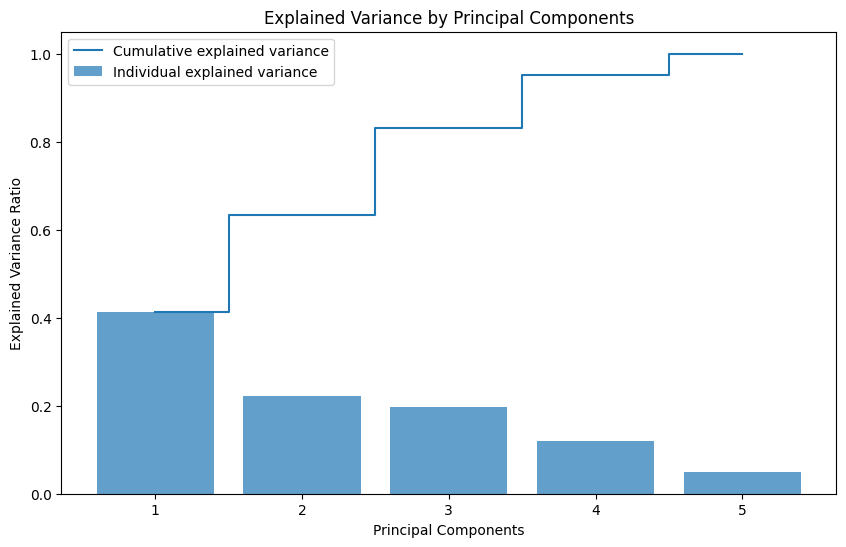

In [61]:
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(variables) + 1), explained_variance, alpha=0.7, align='center', label='Individual explained variance')
plt.step(range(1, len(variables) + 1), explained_variance.cumsum(), where='mid', label='Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc='best')
plt.title('Explained Variance by Principal Components')
plt.show()

# Կորելացիոն շրջանի պատկերում

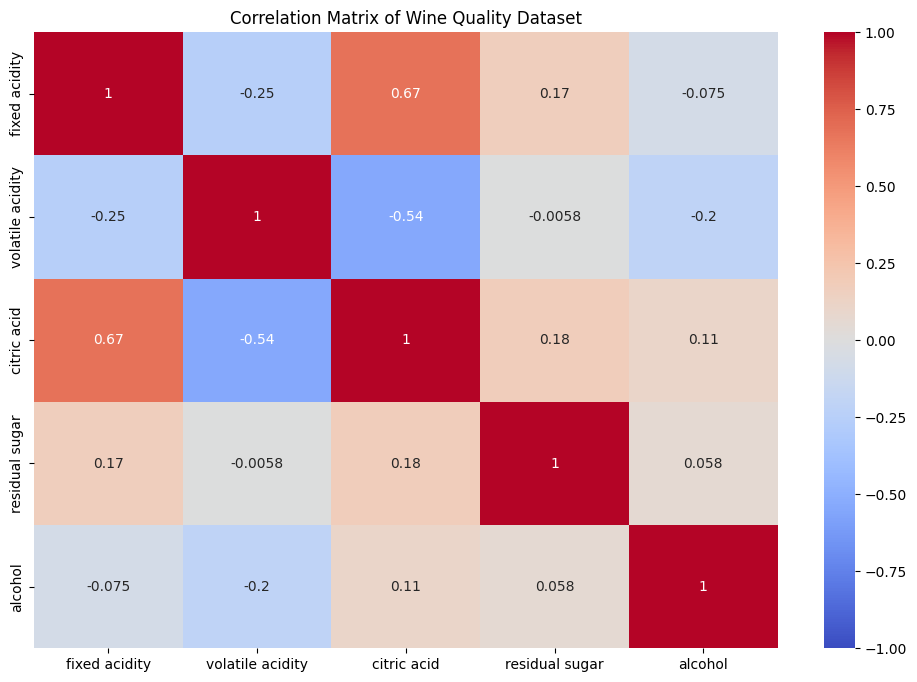

In [62]:
correlation_matrix = df[variables].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Wine Quality Dataset')
plt.show()

# Տվյալների պրոյեկցիան առաջին երկու հիմնական ուղղությունների վրա։

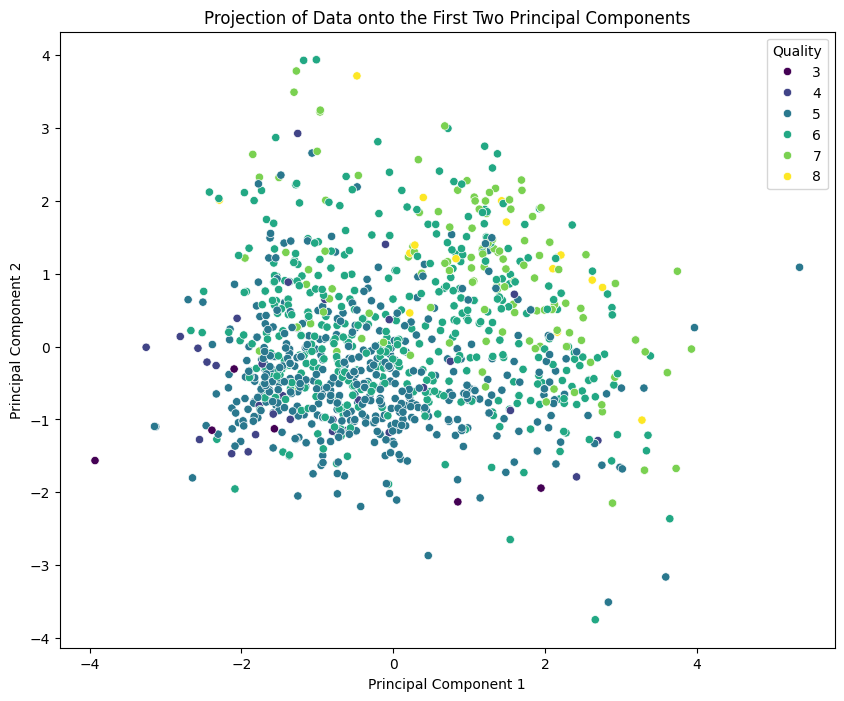

In [66]:
X = df[variables]

X_standardized = (X - X.mean()) / X.std()

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_standardized)

pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['quality'] = df['quality']

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='quality', palette='viridis', data=pca_df)
plt.title('Projection of Data onto the First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Quality')
plt.show()